# 단순선형회귀 연습문제

## #01. 작업준비

### 패키지 참조

In [1]:
from pandas import read_excel
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

In [2]:
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r

### 데이터 가져오기

수분함유량에 따른 강도

In [3]:
df = read_excel("https://data.hossam.kr/E04/beans.xlsx")
df

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


## #02. 탐색적 데이터분석

### 산점도 그래프

In [4]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.unicode_minus'] = False

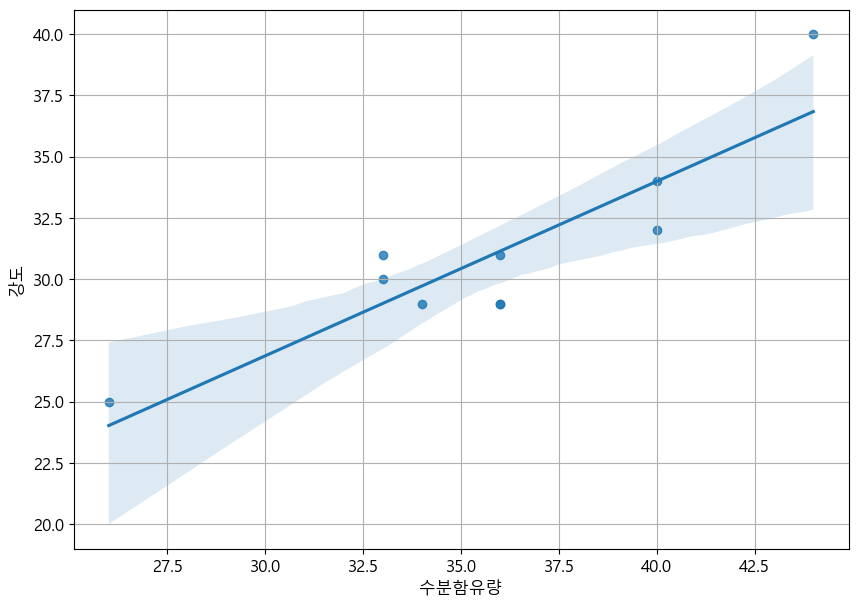

In [5]:
sb.regplot(df, x='수분함유량', y='강도')
plt.grid()
plt.show()
plt.close()

## #03. 추론통계

### 1) 상관분석

In [6]:
pearson_r(df)

,statistic,pvalue,result
fields,,,
수분함유량vs강도,0.888052,0.000599,True
강도vs수분함유량,0.888052,0.000599,True


> 상관분석결과 : p-value가 0.05보다 작으므로 수분함유량과 강도 간의 양의 상관관계가 통계적으로 유의함을 알 수 있다.

### 2) 회귀분석

#### 분석을 위한 학습모델 구성

In [7]:
model = ols("강도 ~ 수분함유량", data=df)
model

#### 분석수행

In [8]:
fit = model.fit()
fit

#### 분석결과 수행

In [9]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           0.000599
Time:                        16:27:37   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.2

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### 모형적합도 해석

1) R-squared : 강도를 수분함유량이 약 78% 설명한다.

2) Adj. R-squared : R-squared를 보정한 값 (약 76%~78% 설명한다.)

3) F-statistic / Prob(F-statistic) : 0.000599로서 유의수준 0.05보다 작으므로 유의미성 검증결과 유의미하다. 

4) AIC/BIC :


#### 독립변수보고 해석

1) 회귀계수 coef : intercept(절편)은 5.4991, 수분함유량(기울기)는 0.7123 <br> 수식 : $강도 = 0.7123 \times 수분함유량 + 5.4991$. <br> 절편의 추정치(5.4991)은 수분함유량이 0일때 강도의 값. <br> 수분함유량의 계수 추정치는 0.7123으로 수분함유량이 1증가할 때마다 강도가 0.7123 증가한다는 것을 의미

2) p값 : 모집단에서 계수가 0일때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률

## #04. 결과보고

### 모형적합도 보고
- `강도`에 대하여 `수분함유량`을 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미 하였다. (F(1,8)=29.85, p <0.05)

### 독립변수에 대해 보고
- `수분함유량` 의 회귀계수는 0.7123로, `강도`에 대해서 유의미한 예측변인인 것으로 나타났다. (t(8)=5.463, p<0.05)